In [19]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import yfinance as yf

In [20]:
# matplotlib Setting
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [21]:
from backdata import tickers, start_year, start_month, start_day, end_year, end_month, end_day

start_date = str(start_year) + '-' + str(start_month) + '-' + str(start_day)
end_date = str(end_year) + '-' + str(end_month) + '-' + str(end_day)

In [22]:
tickers = tickers

In [23]:
ohlc = yf.download(tickers, start = start_date)
prices = ohlc["Adj Close"].dropna(how="all")

[*********************100%***********************]  26 of 26 completed


In [24]:
df = prices[prices.index >= start_date]
df

,AAPL,AMT,AMZN,BHP,BOTZ,BRK-B,CMG,CVX,EQIX,GOOGL,...,RTX,SCHD,SO,TSLA,UNH,UPS,VOO,VTI,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,12.540044,48.573872,8.951500,41.041012,NaN,77.680000,341.269989,71.152679,80.479614,16.651901,...,36.344608,19.264130,27.804974,1.872000,43.644604,53.987938,95.837318,53.753098,47.333107,55.358429
2012-01-04,12.607438,49.275925,8.875500,41.057480,NaN,76.800003,348.750000,71.030167,80.209320,16.723724,...,36.534466,19.264130,27.786442,1.847333,44.280308,53.754978,96.001724,53.777843,46.846676,55.371300
2012-01-05,12.747403,49.845829,8.880500,40.283424,NaN,76.930000,350.480011,70.333939,83.269852,16.491741,...,36.183975,19.249548,27.749405,1.808000,44.576988,53.230820,96.314026,54.016872,46.619152,55.203941
2012-01-06,12.880662,49.763229,9.130500,39.772884,NaN,76.389999,348.950012,69.824623,83.404991,16.266768,...,35.974648,19.162050,27.465361,1.794000,44.738033,53.492901,96.116776,53.893230,46.289623,54.791958
2012-01-09,12.860230,49.903637,8.928000,39.915615,NaN,76.290001,339.739990,70.585350,85.654671,15.577077,...,36.071995,19.205793,27.755569,1.816667,44.687176,53.471054,96.264725,54.016872,46.430843,55.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-13,153.839996,254.630005,126.820000,52.180000,20.070000,278.290009,1701.060059,159.410004,636.270020,104.320000,...,83.720001,71.699997,78.230003,292.130005,513.960022,192.710007,361.380005,197.770004,135.220001,95.330002
2022-09-14,155.309998,251.820007,128.550003,52.020000,20.049999,278.420013,1721.489990,163.270004,626.679993,105.000000,...,86.400002,71.760002,79.430000,302.609985,509.769989,190.960007,362.730011,198.539993,134.919998,97.669998
2022-09-15,152.369995,245.059998,126.279999,51.680000,19.790001,276.700012,1710.650024,160.619995,616.320007,102.910004,...,85.610001,71.190002,77.290001,303.750000,522.909973,185.000000,358.679993,196.419998,133.470001,94.830002


In [25]:
daily_ret = df.pct_change()  # 종목 수정 종가데이터의 일별주가상승률
annual_ret = daily_ret.mean() * 252 # 연평균 주가상승률
daily_cov = daily_ret.cov() # 일별주가상승률의 공분산행렬
annual_cov = daily_cov * 252 # 공분산행렬과 영업일 수의 곱

port_ret = [] # 포트폴리오의 일별주가상승률
port_risk = [] # 리스크
port_weights = [] # 비중
sharpe_ratio = []

In [26]:
for _ in tqdm(range(1000000)): # 임의로 만들 포트폴리오
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights) # 임의의 가중치를 랜덤으로 부여

    returns = np.dot(weights, annual_ret) # 가중치와 연 수익률 행렬과 내적을 실시
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) # 포트폴리오의 변동성의 기댓값을 산출

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

100%|██████████| 1000000/1000000 [00:48<00:00, 20509.30it/s]


In [27]:
portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(tqdm(tickers)):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in tickers]]
df

100%|██████████| 26/26 [00:04<00:00,  5.21it/s]


,Returns,Risk,Sharpe,BOTZ,SCHD,VOO,VTI,BHP,LIN,GOOGL,...,JNJ,UPS,RTX,AMT,PLD,EQIX,AAPL,MSFT,NEE,SO
0,0.152479,0.165253,0.922697,0.007437,0.054295,0.031119,0.084484,0.036256,0.028189,0.004936,...,0.073130,0.076166,0.002635,0.001018,0.024050,0.021444,0.020976,0.049326,0.019680,0.014099
1,0.193639,0.179831,1.076780,0.021510,0.019067,0.062833,0.064428,0.050689,0.019930,0.069067,...,0.018467,0.042932,0.006161,0.071511,0.038997,0.013850,0.025153,0.070990,0.046954,0.063008
2,0.195164,0.176897,1.103262,0.033551,0.048531,0.059924,0.001662,0.060851,0.064530,0.069917,...,0.044991,0.007822,0.032100,0.039601,0.074525,0.025635,0.030571,0.063923,0.009754,0.036707
3,0.175249,0.164821,1.063271,0.001238,0.003131,0.038610,0.062967,0.039023,0.037380,0.031810,...,0.056436,0.000590,0.045323,0.042164,0.061144,0.040307,0.055976,0.037993,0.026438,0.050087
4,0.171721,0.161476,1.063451,0.051907,0.018046,0.056338,0.016386,0.018416,0.059209,0.015557,...,0.038757,0.050708,0.042217,0.017954,0.016165,0.065443,0.056105,0.052031,0.040545,0.058974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.176014,0.165324,1.064659,0.049841,0.048614,0.027644,0.029923,0.056415,0.022339,0.063621,...,0.062963,0.061718,0.036249,0.031184,0.030376,0.021416,0.003102,0.059721,0.033041,0.007424
999996,0.199569,0.173766,1.148493,0.052609,0.040530,0.038289,0.067171,0.061210,0.004698,0.041163,...,0.012341,0.076512,0.058778,0.071985,0.023030,0.069272,0.013773,0.025618,0.047237,0.010775
999997,0.197954,0.169527,1.167683,0.049912,0.039323,0.031877,0.027343,0.053017,0.076575,0.018279,...,0.038908,0.031072,0.011579,0.064740,0.014676,0.036087,0.006241,0.005001,0.067859,0.005918
999998,0.162702,0.163534,0.994911,0.028890,0.024383,0.015253,0.063992,0.035915,0.038496,0.026979,...,0.050874,0.013958,0.020502,0.000798,0.026124,0.000388,0.068981,0.043271,0.076648,0.027665


In [28]:
min_risk = df.loc[df['Risk'] == df['Risk'].min()]  # Low Risk
max_sharpe = df.loc[df['Sharpe'] == df['Sharpe'].max()]  # Max Sharpe

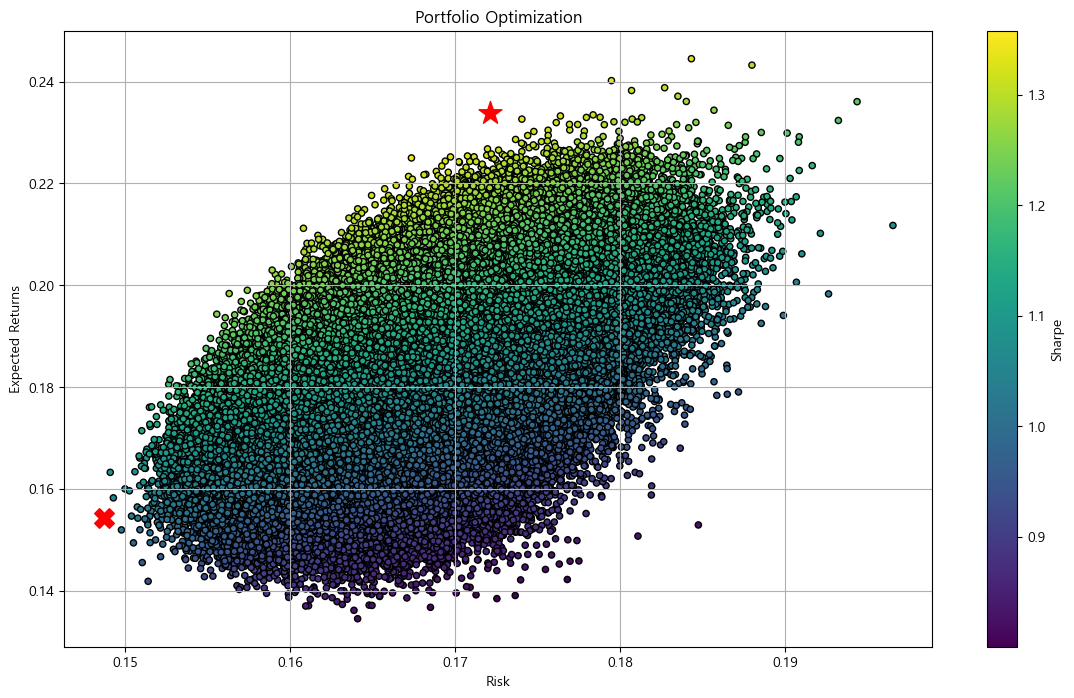

In [29]:
df.plot.scatter(x='Risk', y='Returns', c='Sharpe', cmap='viridis',
                edgecolors='k', grid=True)
# 샤프지수가 가장 큰 포트폴리오
plt.scatter(x=max_sharpe['Risk'], y=max_sharpe['Returns'], c='r',
            marker='*', s=300)
# 리스크가 제일 작은 포트폴리오
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r',
            marker='X', s=200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

In [30]:
min_risk

,Returns,Risk,Sharpe,BOTZ,SCHD,VOO,VTI,BHP,LIN,GOOGL,...,JNJ,UPS,RTX,AMT,PLD,EQIX,AAPL,MSFT,NEE,SO
699455,0.154352,0.148717,1.037887,0.03392,0.074197,0.00598,0.006762,0.007571,0.055847,0.027854,...,0.042283,0.049598,0.082735,0.007367,0.002369,0.088809,0.025898,0.00825,0.089606,0.053993


In [31]:
max_sharpe

,Returns,Risk,Sharpe,BOTZ,SCHD,VOO,VTI,BHP,LIN,GOOGL,...,JNJ,UPS,RTX,AMT,PLD,EQIX,AAPL,MSFT,NEE,SO
469766,0.233744,0.172152,1.35778,0.058214,0.076955,0.080835,0.021444,0.006187,0.005687,0.02508,...,0.016847,0.059484,0.001455,0.093386,0.069655,0.026355,0.006269,0.026547,0.027496,0.006475


In [32]:
stock_weight_dict = dict(zip(list(max_sharpe[tickers].columns),
                             max_sharpe[tickers].values.flatten().tolist()))
stock_weight_dict

{'BOTZ': 0.05821416210209889,
 'SCHD': 0.0769551555944458,
 'VOO': 0.08083487397793099,
 'VTI': 0.021443944386327077,
 'BHP': 0.00618698518357111,
 'LIN': 0.005687444320980899,
 'GOOGL': 0.02508013375115298,
 'AMZN': 0.0015339800846331355,
 'TSLA': 0.04891156319054756,
 'WMT': 0.012066780650823719,
 'PG': 0.09848499164858827,
 'CMG': 0.0009763002889251755,
 'XOM': 0.051373799756842524,
 'CVX': 0.07019849271362104,
 'BRK-B': 0.05060694543701757,
 'UNH': 0.05747583751981366,
 'JNJ': 0.01684660225690549,
 'UPS': 0.059483988443121326,
 'RTX': 0.0014552557774912742,
 'AMT': 0.09338551143081442,
 'PLD': 0.06965517313414578,
 'EQIX': 0.026355086822239634,
 'AAPL': 0.006269055154791601,
 'MSFT': 0.026546641967657984,
 'NEE': 0.027496109864489943,
 'SO': 0.006475184541022073}

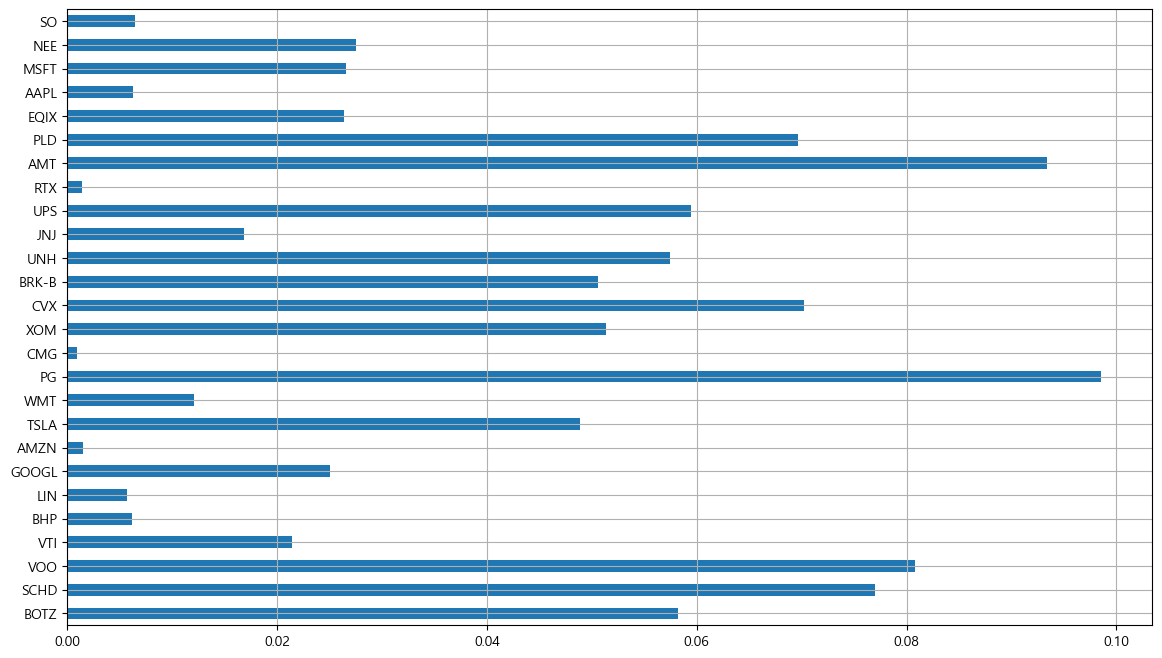

In [33]:
from collections import OrderedDict

weights = OrderedDict(stock_weight_dict)
pd.Series(weights).plot.barh();

In [34]:
def print_orderdict(dict, postfix='%', space=8, title='', line=1):
    print(title)
    idx = 0
    for i in dict:
        idx += 1
        if postfix=='%':
            num = str(round(dict[i]*100, 2))
        else:
            num = str(dict[i])
        print(i.ljust(6), (num+postfix).rjust(space), end="")
        if idx % line == 0:
            print()

In [35]:
# TODO: 투자금 입력
deposit = 8000

In [36]:
from pypfopt.discrete_allocation import DiscreteAllocation

latest_prices = prices.iloc[-1] # 마지막 종가 기준

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=deposit)
allocation, leftover = da.greedy_portfolio()

buy = 0
for k  in allocation:
    buy += latest_prices[k] * allocation[k]

print("Total Asset($): ", deposit)
print("Total buy($): ", round(buy, 2), ", leftover($):", round(deposit - buy, 2))
print_orderdict(allocation,
                postfix=" stk",
                title="** Optimal Weights **")

Total Asset($):  8000
Total buy($):  7984.39 , leftover($): 15.61
** Optimal Weights **
PG        5 stk
AMT       3 stk
VOO       2 stk
SCHD      8 stk
CVX       3 stk
PLD       4 stk
UPS       3 stk
BOTZ     23 stk
UNH       1 stk
XOM       4 stk
BRK-B     2 stk
TSLA      1 stk
NEE       2 stk
MSFT      1 stk
EQIX      1 stk
GOOGL     1 stk
VTI       1 stk
JNJ       1 stk
SO        1 stk
